This Notebook recommends other genres to the user based on a specified genre

First create a DataFrame based on the csv file which contains information about genres

In [1]:
import pandas as pd 
genre_DF = pd.read_csv("data_by_genres.csv")

In [2]:
import math

First for some pre-processing of the data frame

In [3]:
#get abs val of loudness column as all loudness values are negative 
genre_DF['loudness'] = genre_DF['loudness'].abs()
#remove the empty genre
genre_DF = genre_DF[genre_DF['genres'] != ('[]' or ' ' or '')]
#keep track of original genres
genre_df = genre_DF.copy(deep=True)
#now make genres insensitive to spaces for user input
genre_DF['genres'] = genre_DF['genres'].str.replace(' ', '')
# Restrict DF to desired characteristics for comparison
columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']
c_df = genre_DF[columns] 
#normalise columns using min-max normalisation
genre_norm = (c_df-c_df.min())/(c_df.max()-c_df.min())
genre_norm.fillna(0, inplace=True) #automatically set na vals to 0

Define a function that returns the normalised vector for the given genre

In [4]:
def normal_genre(genre):
    given_g_norm = genre_norm[genre_DF["genres"] == genre]
    return given_g_norm

Define simple euclidean distance function to calculate the distance regarding all characteristics

In [5]:
def euclidean_distance(row):
    given_g_norm = normal_genre(genre)
    v = 0
    for c in columns:
        v += (row[c] - given_g_norm[c]) ** 2
    return math.sqrt(v)

Define function that sorts genres by similarity to input genre

In [6]:
def similarity():
# Find the similarity index for each other genre
    genre_n_similarity = genre_norm.apply(euclidean_distance, axis=1)
#Sort by ascending value: 0 represents exact similarity
    genre_n_similarity = genre_n_similarity.sort_values(ascending= True)
    return genre_n_similarity

Get the index values of most similar genres with length equal to a given number

In [7]:
def index_list(no_given):
    indexlist = []
    sim_byindex = genre_n_similarity[1:no_given+1].index
    for i in range(0, no_given):
        indexlist.append(int(sim_byindex[i]))
    return indexlist

Function to take user input as no. of genres to recommend

In [8]:
def select_no_genres():
    f1 = input("Please select the number of genres you would like: ")
    while True:
        if not f1.isnumeric():
            f1 = input("Please enter a positive numeric value: ")
        else:
            break
    f1 = int(f1)        
    return f1

Function to take user input as selected genre

In [9]:
def select_genre():
    genre_in = input("Please enter a genre to receive recommendations: ")
    genre_in = genre_in.replace(" ", "").lower()
    while True:
        if genre_in not in genre_DF['genres'].tolist():
            genre_in = input("Please enter a valid genre: ")
            genre_in = genre_in.replace(" ", "").lower()
        else:
            break   
    return genre_in

Here is where the user inputs desired genre and no. to receive recommendations

In [10]:
genre = select_genre()
no_given = select_no_genres()

genre_n_similarity = similarity()
indexlist = index_list(no_given)
print('Here are ' + str(no_given) + ' similar genres you might like: ' + str(genre_df.loc[indexlist]['genres'].tolist()))

Please enter a genre to receive recommendations: electronica
Please select the number of genres you would like: 11
Here are 11 similar genres you might like: ['downtempo', 'trip hop', 'jazztronica', 'nu jazz', 'livetronica', 'chillwave', 'chamber psych', 'swedish synthpop', 'smooth saxophone', 'modern dream pop', 'ninja']


Function for user to select which metric to compare given genres by

In [11]:
def select_metric():
    metric_in = input("Please enter a metric to compare genres by. Choose one from the following list: 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', or 'popularity' : ").lower()
    while True:
        if (metric_in not in columns) or (metric_in == 'genres'):
            metric_in = input("Please enter a valid metric from the list: ").lower()
        else:
            break   
    return metric_in

In [12]:
columns.insert(0,'genres') #add genres to the list of desired columns

Include original genre in visual comparison

In [13]:
newindexlist = []
sim_byindex = genre_n_similarity[0:no_given].index
for i in range(0, no_given):
    newindexlist.append(int(sim_byindex[i]))
df_display = genre_df.loc[newindexlist][columns]

Request user input for which metric to compare by, sort by ascending

In [14]:
metric = select_metric()
df_display = df_display.sort_values(by=[metric], ascending=True)

Please enter a metric to compare genres by. Choose one from the following list: 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', or 'popularity' : danceability


Plot graph comparing recommended genres based on chosen metric 

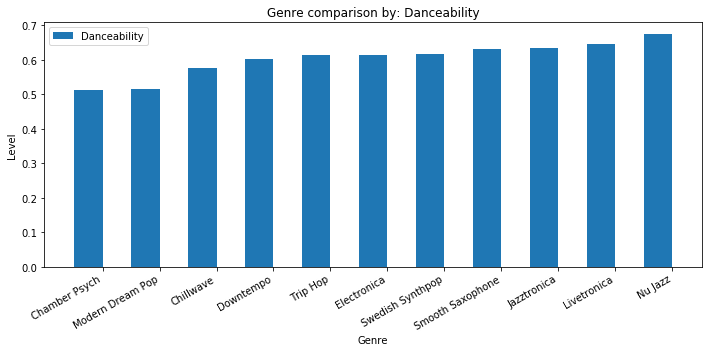

In [16]:
import matplotlib.pyplot as plt
import numpy as np

labels = [x.title() for x in df_display['genres']] #labels of the bars
value = df_display[metric] #display chosen metric

x = np.arange(len(labels))  #get values for interval
bar_w = 0.5  # set width of bars

f, ax = plt.subplots(figsize = (10,5)) #make the plot, custom size
bar1 = ax.bar(x - bar_w/2, value, bar_w, label=metric.title()) #set the bars

# Adding text
ax.set_ylabel('Level')
ax.set_xlabel('Genre')
ax.set_title('Genre comparison by: ' + metric.title())
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
f.autofmt_xdate() #make space for the labels 

f.tight_layout()
plt.show() #display the graph